In [280]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

In [282]:
df = pd.read_csv(r"100000 Sales Records - final.csv")

In [283]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item Type       100000 non-null  object 
 3   Sales Channel   100000 non-null  object 
 4   Order Priority  100000 non-null  object 
 5   Order Date      100000 non-null  object 
 6   Order ID        100000 non-null  int64  
 7   Ship Date       100000 non-null  object 
 8   Units Sold      100000 non-null  int64  
 9   Unit Price      100000 non-null  float64
 10  Unit Cost       100000 non-null  float64
 11  Total Revenue   100000 non-null  float64
 12  Total Cost      100000 non-null  float64
 13  Total Profit    100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


In [285]:
df.columns = df.columns.str.replace(' ', '_', regex=True)


In [286]:
df.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item_Type       100000 non-null  object 
 3   Sales_Channel   100000 non-null  object 
 4   Order_Priority  100000 non-null  object 
 5   Order_Date      100000 non-null  object 
 6   Order_ID        100000 non-null  int64  
 7   Ship_Date       100000 non-null  object 
 8   Units_Sold      100000 non-null  int64  
 9   Unit_Price      100000 non-null  float64
 10  Unit_Cost       100000 non-null  float64
 11  Total_Revenue   100000 non-null  float64
 12  Total_Cost      100000 non-null  float64
 13  Total_Profit    100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


In [288]:
df[['Order_Date', 'Ship_Date']] = df[['Order_Date', 'Ship_Date']].apply(pd.to_datetime)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          100000 non-null  object        
 1   Country         100000 non-null  object        
 2   Item_Type       100000 non-null  object        
 3   Sales_Channel   100000 non-null  object        
 4   Order_Priority  100000 non-null  object        
 5   Order_Date      100000 non-null  datetime64[ns]
 6   Order_ID        100000 non-null  int64         
 7   Ship_Date       100000 non-null  datetime64[ns]
 8   Units_Sold      100000 non-null  int64         
 9   Unit_Price      100000 non-null  float64       
 10  Unit_Cost       100000 non-null  float64       
 11  Total_Revenue   100000 non-null  float64       
 12  Total_Cost      100000 non-null  float64       
 13  Total_Profit    100000 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int

## missing values

In [290]:
df.isnull().sum()

Region            0
Country           0
Item_Type         0
Sales_Channel     0
Order_Priority    0
Order_Date        0
Order_ID          0
Ship_Date         0
Units_Sold        0
Unit_Price        0
Unit_Cost         0
Total_Revenue     0
Total_Cost        0
Total_Profit      0
dtype: int64

In [291]:
## duplicates
df.duplicated().sum()

0

In [292]:
## No missing and Duplicate Values

### Detecting Anomalies 

In [293]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%m/%d/%Y')

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          100000 non-null  object        
 1   Country         100000 non-null  object        
 2   Item_Type       100000 non-null  object        
 3   Sales_Channel   100000 non-null  object        
 4   Order_Priority  100000 non-null  object        
 5   Order_Date      100000 non-null  datetime64[ns]
 6   Order_ID        100000 non-null  int64         
 7   Ship_Date       100000 non-null  datetime64[ns]
 8   Units_Sold      100000 non-null  int64         
 9   Unit_Price      100000 non-null  float64       
 10  Unit_Cost       100000 non-null  float64       
 11  Total_Revenue   100000 non-null  float64       
 12  Total_Cost      100000 non-null  float64       
 13  Total_Profit    100000 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int

In [295]:
df.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,2014-10-23,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2015-02-27,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,2014-10-12,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,2010-03-05,5858,668.27,502.54,3914725.66,2943879.32,970846.34


## Anomaly Detection and Resampling

In [296]:

# Select numeric columns for anomaly detection
numeric_cols = ['Units_Sold', 'Unit_Price', 'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit']

In [297]:
# Step 1: Anomaly detection using Z-score
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
z_threshold = 3
z_anomalies = z_scores > z_threshold

In [298]:
# Step 2: Anomaly detection using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
iqr_anomalies = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))

In [299]:
# Combine both anomaly detection methods
combined_anomalies = z_anomalies | iqr_anomalies

In [300]:
# Print summary of anomalies
print("Anomaly summary:")
print(combined_anomalies.sum())

Anomaly summary:
Units_Sold          0
Unit_Price          0
Unit_Cost           0
Total_Revenue    6597
Total_Cost       9678
Total_Profit     4125
dtype: int64


In [301]:
# Step 3: Correct anomalies by removing them
# You can choose to remove rows with anomalies
df_cleaned = df[~combined_anomalies.any(axis=1)]

print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")

Original dataset size: 100000 rows
Cleaned dataset size: 88089 rows


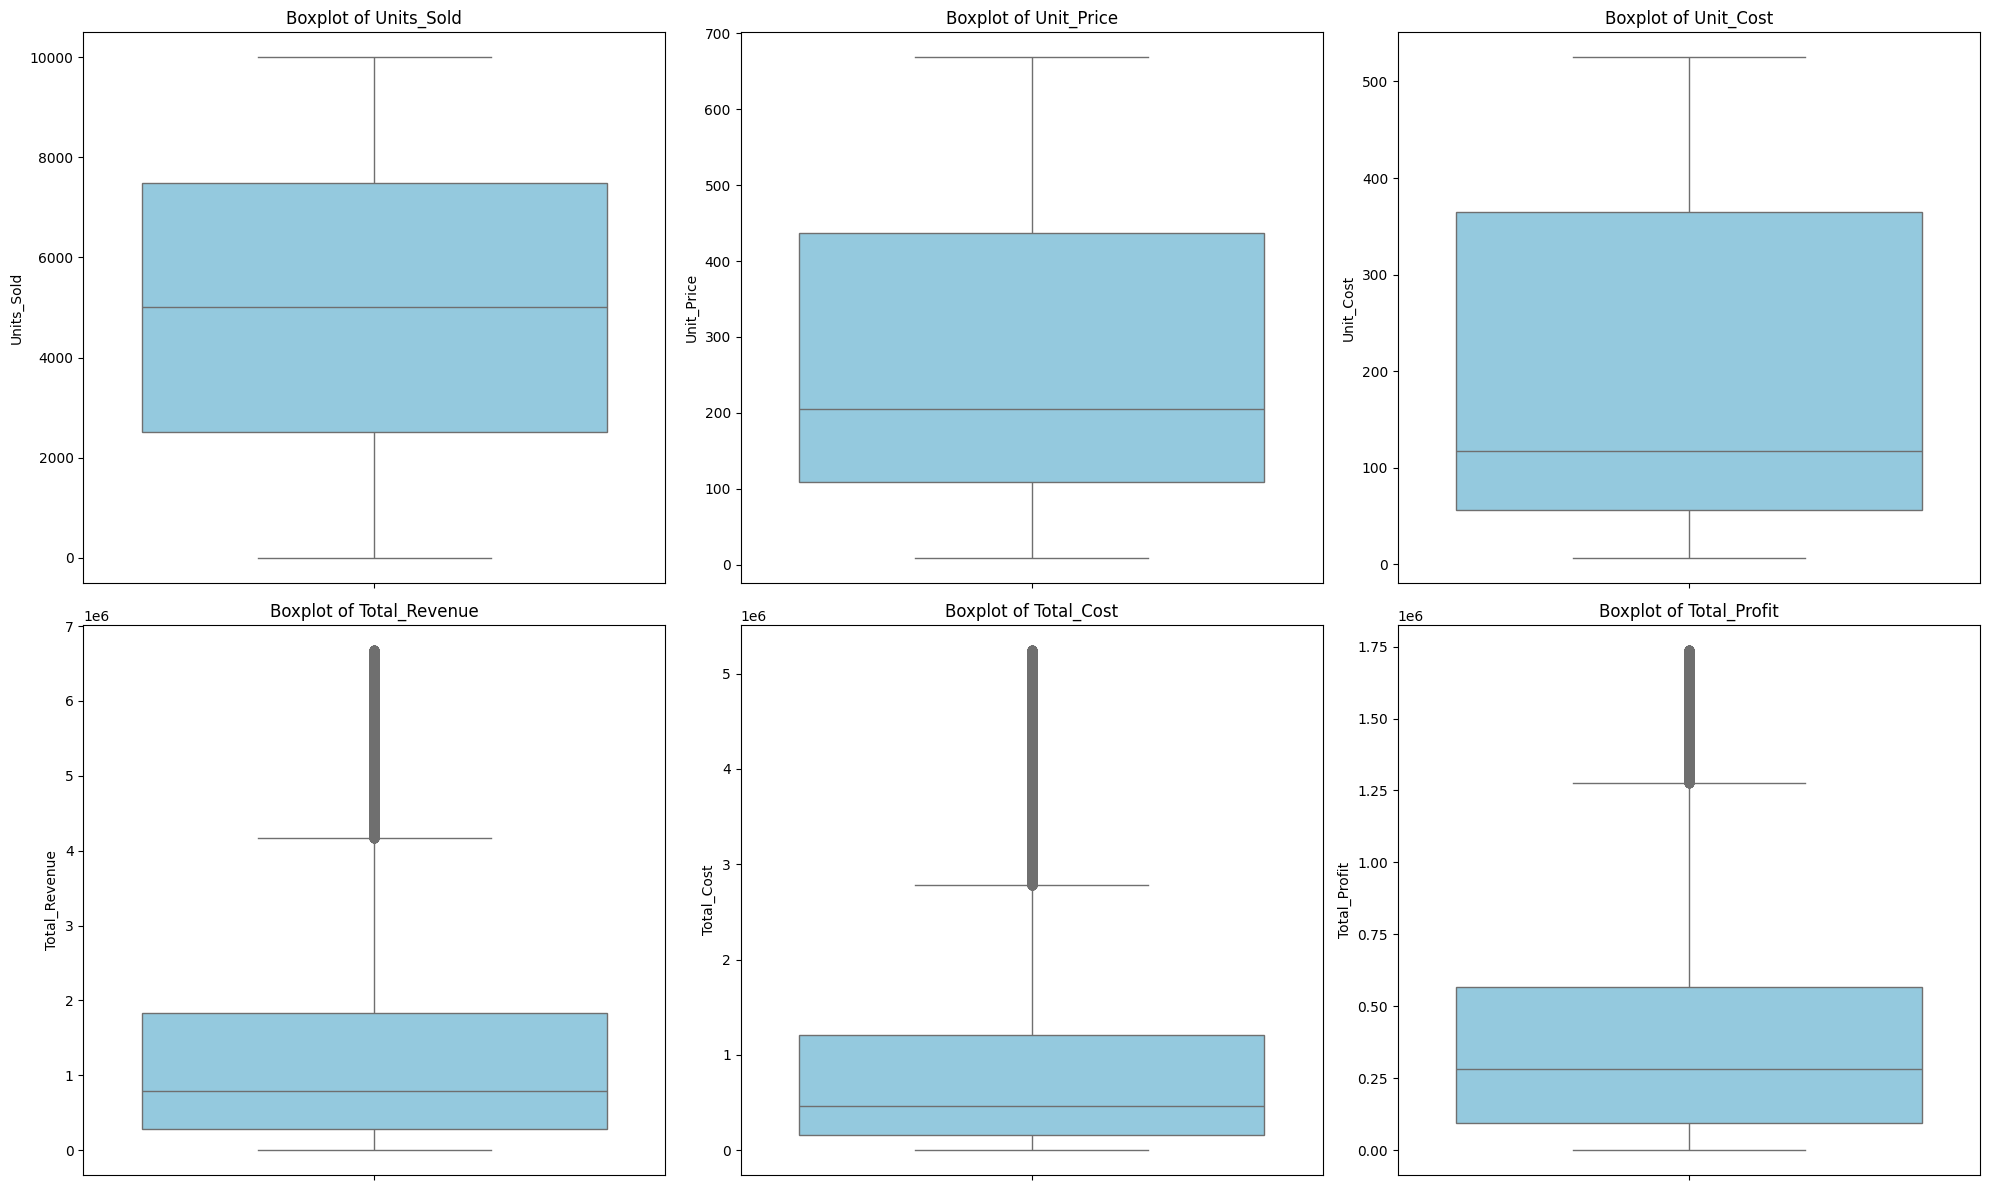

In [302]:
# Step 4: Visualization

# Boxplots
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [303]:
## Total Revenue, Total Cost, Total Profit had outliers in the dataset

In [304]:
df.shape

(100000, 14)

In [305]:
df_cleaned.shape

(88089, 14)

## Data Augmentation and Sampling

In [306]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [307]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [308]:
df['Order_Priority'].value_counts()

Order_Priority
M    25088
L    25016
C    24951
H    24945
Name: count, dtype: int64

In [309]:

# Step 1: Identify categorical, numeric, and datetime columns
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns
datetime_columns = df.select_dtypes(include=['datetime']).columns

In [310]:
# Step 2: Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    if col not in datetime_columns:  # Ensure not applying on datetime columns
        df[col] = label_encoder.fit_transform(df[col])

In [311]:
# Step 1: Target column for balancing (e.g., 'Order Priority')
target_column = 'Order_Priority'

In [312]:
X = df.drop(columns=[target_column]+ list(datetime_columns))   # Features
y = df[target_column]                # Target

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 7: Convert resampled data back to DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=[target_column])

In [313]:
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [314]:
df_resampled.head()

,Region,Country,Item_Type,Sales_Channel,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Order_Priority
0,0,96,1,0,389635980,800,47.45,31.79,37960.00,25432.00,12528.00,3
1,3,158,0,0,883412635,285,255.28,159.42,72754.80,45434.70,27320.10,1
2,0,69,5,0,692481839,9620,9.33,6.92,89754.60,66570.40,23184.20,2
3,3,67,11,0,716717851,1594,154.06,90.93,245571.64,144942.42,100629.22,3
4,3,34,8,0,964654815,1651,651.21,524.96,1075147.71,866708.96,208438.75,0


In [315]:
df_resampled.shape

(80108, 12)

In [316]:
df_resampled['Order_Priority'].value_counts()

Order_Priority
3    20027
1    20027
2    20027
0    20027
Name: count, dtype: int64

In [317]:
## Resampled

In [318]:
# Step 7: Save the augmented dataset
augmented_file_path = 'augmented_sales_records.csv'
df_resampled.to_csv(augmented_file_path, index=False)

In [319]:
# Print class distributions
print("Original dataset class distribution:")
print(df[target_column].value_counts())

print("\nResampled dataset class distribution:")
print(df_resampled[target_column].value_counts())


Original dataset class distribution:
Order_Priority
3    25088
2    25016
0    24951
1    24945
Name: count, dtype: int64

Resampled dataset class distribution:
Order_Priority
3    20027
1    20027
2    20027
0    20027
Name: count, dtype: int64


## Exploratory Data Analysis

In [320]:
df1 = pd.read_csv(r"100000 Sales Records - final.csv")

In [321]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item Type       100000 non-null  object 
 3   Sales Channel   100000 non-null  object 
 4   Order Priority  100000 non-null  object 
 5   Order Date      100000 non-null  object 
 6   Order ID        100000 non-null  int64  
 7   Ship Date       100000 non-null  object 
 8   Units Sold      100000 non-null  int64  
 9   Unit Price      100000 non-null  float64
 10  Unit Cost       100000 non-null  float64
 11  Total Revenue   100000 non-null  float64
 12  Total Cost      100000 non-null  float64
 13  Total Profit    100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


In [322]:
# Convert 'Order Date' to datetime and extract the year
df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%m/%d/%Y')
df1['Year'] = df1['Order Date'].dt.year

In [323]:
df1.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76,2014
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37,2015
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26,2015
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08,2014
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34,2010


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          100000 non-null  int32         
 1   Country         100000 non-null  int32         
 2   Item_Type       100000 non-null  int32         
 3   Sales_Channel   100000 non-null  int32         
 4   Order_Priority  100000 non-null  int32         
 5   Order_Date      100000 non-null  datetime64[ns]
 6   Order_ID        100000 non-null  int64         
 7   Ship_Date       100000 non-null  datetime64[ns]
 8   Units_Sold      100000 non-null  int64         
 9   Unit_Price      100000 non-null  float64       
 10  Unit_Cost       100000 non-null  float64       
 11  Total_Revenue   100000 non-null  float64       
 12  Total_Cost      100000 non-null  float64       
 13  Total_Profit    100000 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int

In [325]:
# Basic Information and Missing Values

print("\nMissing Values:")
print(df1.isnull().sum())


Missing Values:
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Year              0
dtype: int64


## Number of Order by region

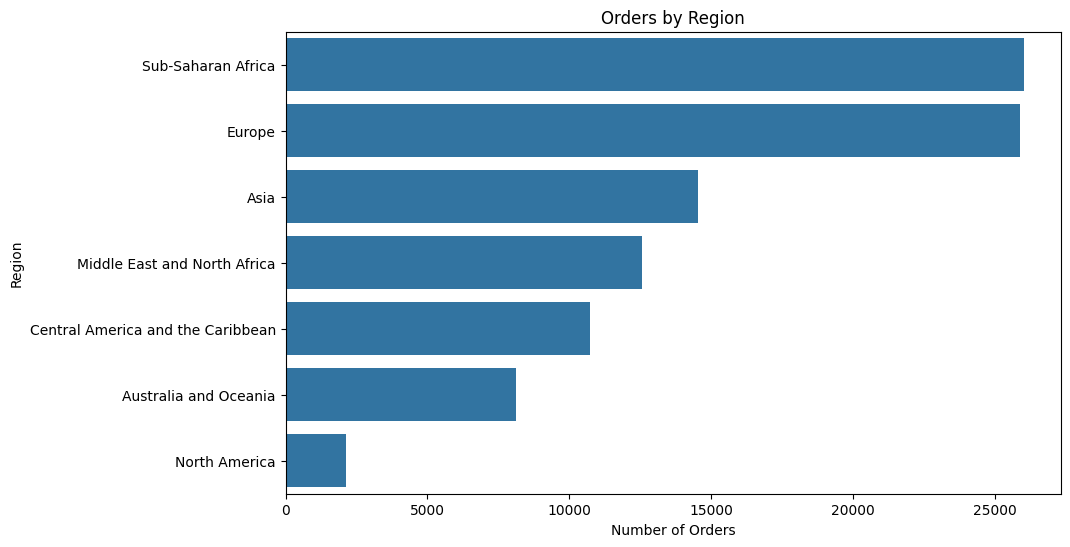

In [326]:
# 1. Univariate Analysis of Categorical Data
plt.figure(figsize=(10, 6))
sns.countplot(y='Region', data=df1, order=df1['Region'].value_counts().index)
plt.title("Orders by Region")
plt.xlabel("Number of Orders")
plt.ylabel("Region")
plt.show()

C:\Users\Enfec Solutions\AppData\Local\Temp\ipykernel_56364\4106717248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df1, palette='viridis')


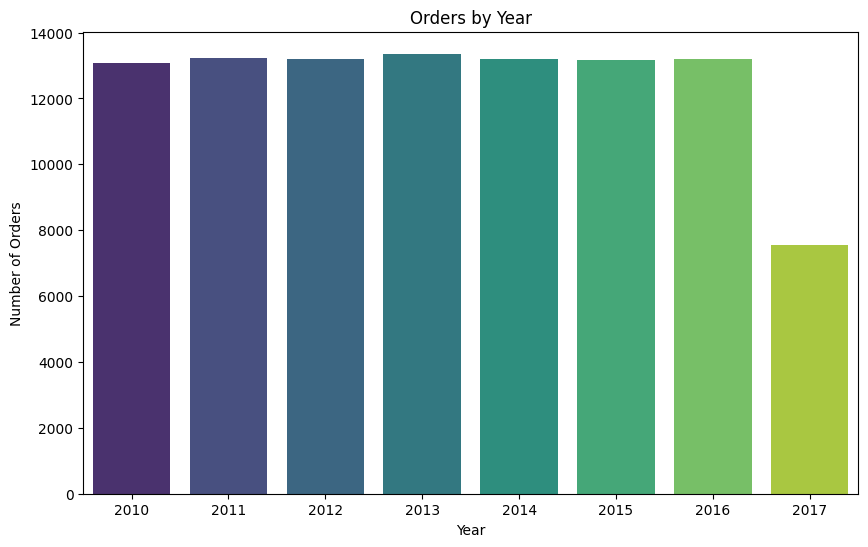

In [327]:
# 2. Orders by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df1, palette='viridis')
plt.title("Orders by Year")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.show()

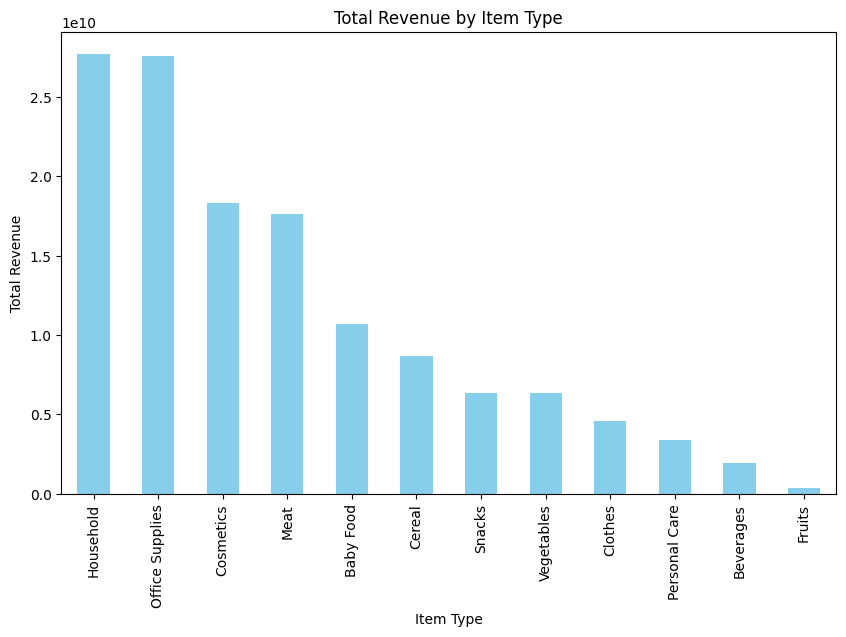

In [328]:
# 3. Total Revenue by Item Type
item_revenue = df1.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
item_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Item Type")
plt.ylabel("Total Revenue")
plt.show()

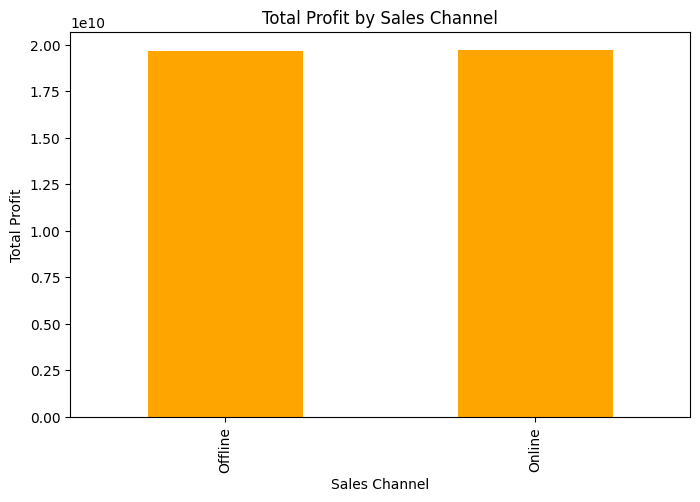

In [329]:
# 4. Profit Trends by Sales Channel
sales_channel_profit = df1.groupby('Sales Channel')['Total Profit'].sum()
plt.figure(figsize=(8, 5))
sales_channel_profit.plot(kind='bar', color='orange')
plt.title("Total Profit by Sales Channel")
plt.ylabel("Total Profit")
plt.show()

## Showing Average Profit By Year

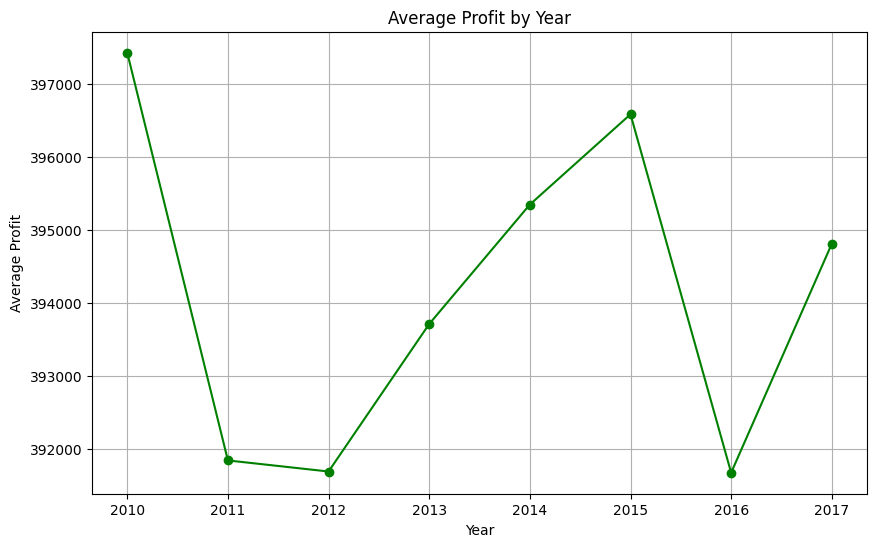

In [330]:
# 5. Average Profit by Year
yearly_profit = df1.groupby('Year')['Total Profit'].mean()
plt.figure(figsize=(10, 6))
yearly_profit.plot(kind='line', marker='o', color='green')
plt.title("Average Profit by Year")
plt.ylabel("Average Profit")
plt.xlabel("Year")
plt.grid()
plt.show()

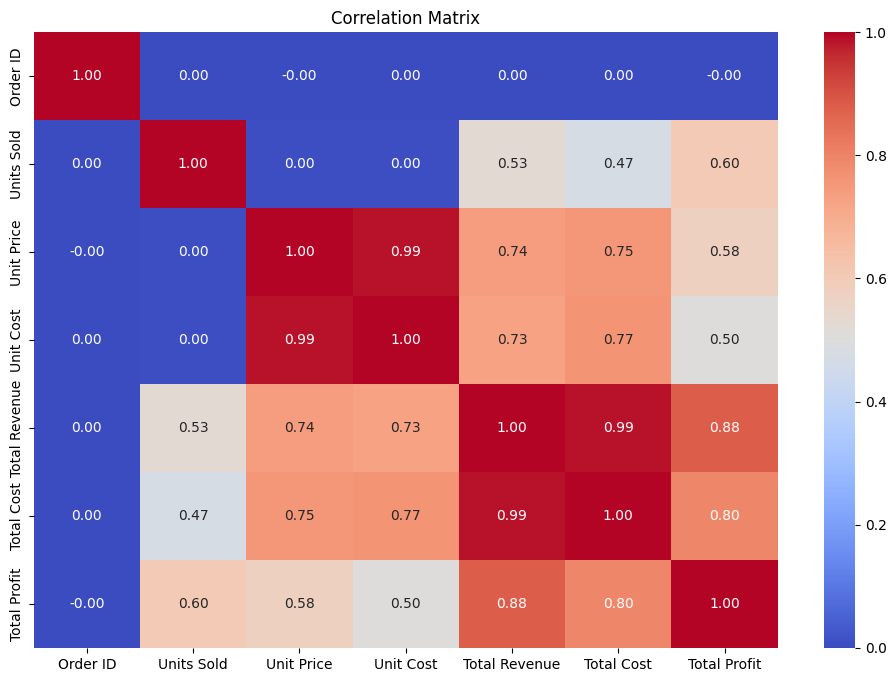

In [331]:
# 6. Correlation Heatmap for Numerical Columns
plt.figure(figsize=(12, 8))
correlation = df1.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [332]:
# Summary of Observations
print("\nTop Regions by Orders:")
print(df1['Region'].value_counts().head())


Top Regions by Orders:
Region
Sub-Saharan Africa                   26019
Europe                               25877
Asia                                 14547
Middle East and North Africa         12580
Central America and the Caribbean    10731
Name: count, dtype: int64


## Tital Revenue by Region and Year

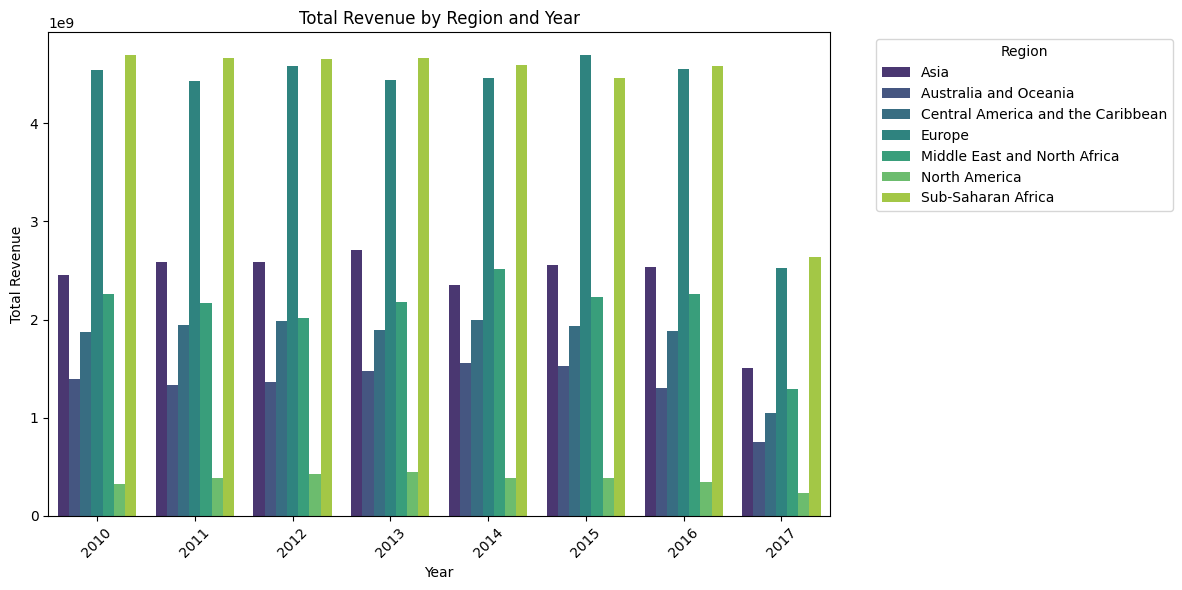

In [333]:
# 7. Total Revenue by Region and Year
plt.figure(figsize=(12, 6))
revenue_by_region_year = df1.groupby(['Region', 'Year'])['Total Revenue'].sum().reset_index()
sns.barplot(x='Year', y='Total Revenue', hue='Region', data=revenue_by_region_year, palette='viridis')
plt.title('Total Revenue by Region and Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Enfec Solutions\AppData\Local\Temp\ipykernel_56364\2789446689.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Profit', y='Region', data=profit_by_region, palette='Blues_r')


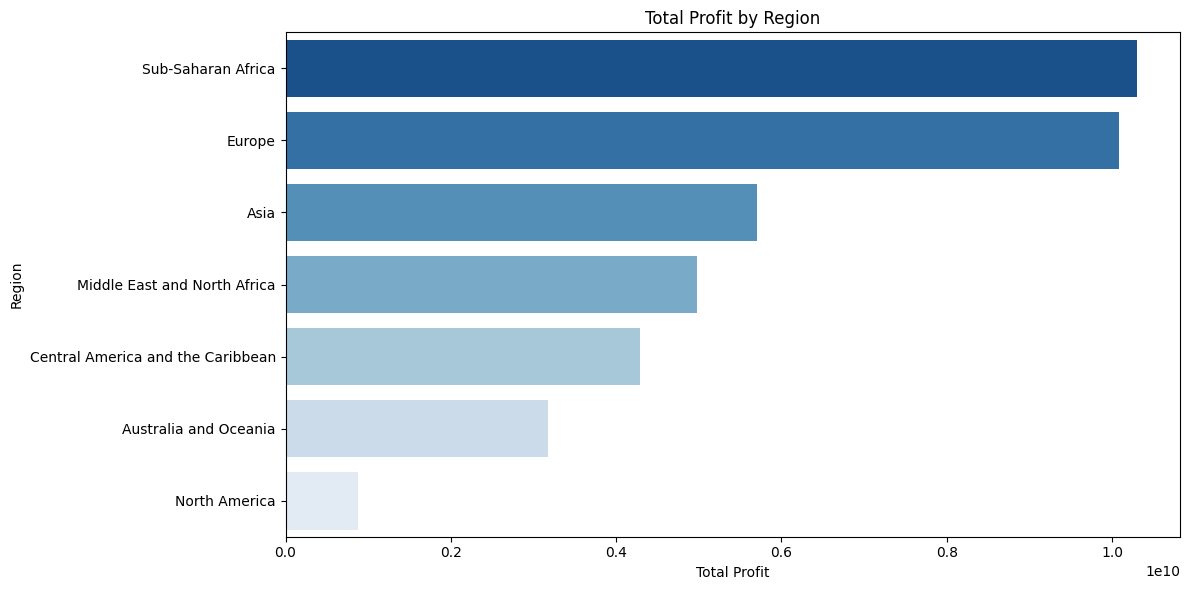

In [334]:

# 8. Total Profit by Region
plt.figure(figsize=(12, 6))
profit_by_region = df1.groupby('Region')['Total Profit'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Total Profit', y='Region', data=profit_by_region, palette='Blues_r')
plt.title('Total Profit by Region')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

## Average Profit by Year

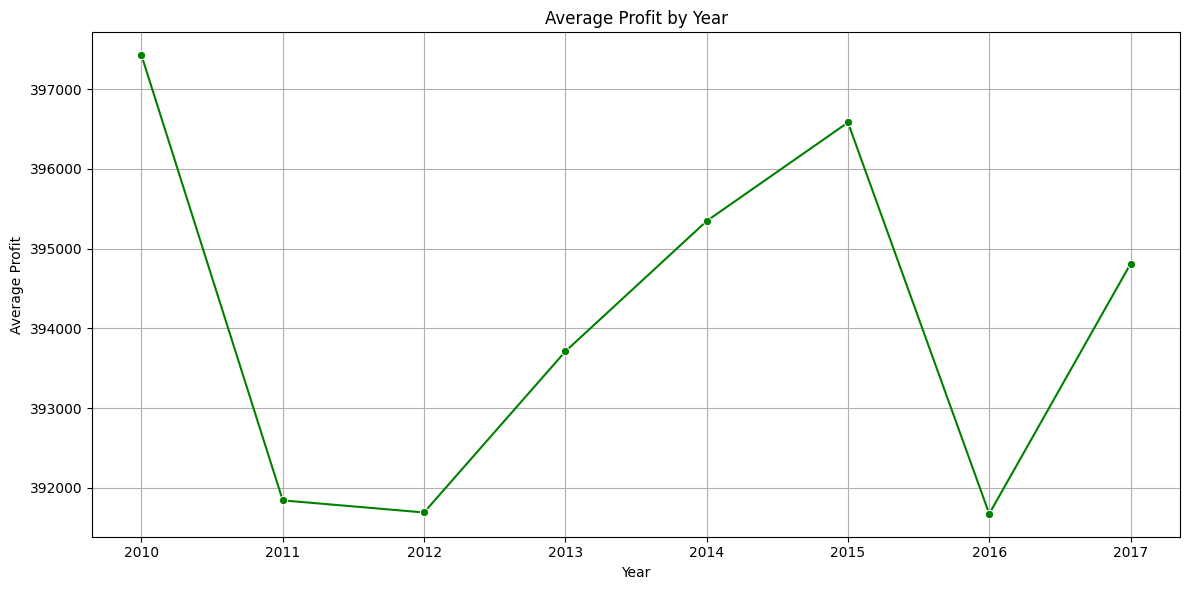

In [335]:
# 9. Average Profit by Year
plt.figure(figsize=(12, 6))
avg_profit_by_year = df1.groupby('Year')['Total Profit'].mean().reset_index()
sns.lineplot(x='Year', y='Total Profit', data=avg_profit_by_year, marker='o', color='green')
plt.title('Average Profit by Year')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.grid()
plt.tight_layout()
plt.show()

## Revenue Distribution by Region

C:\Users\Enfec Solutions\AppData\Local\Temp\ipykernel_56364\3910531081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Total Revenue', data=df1, palette='coolwarm')


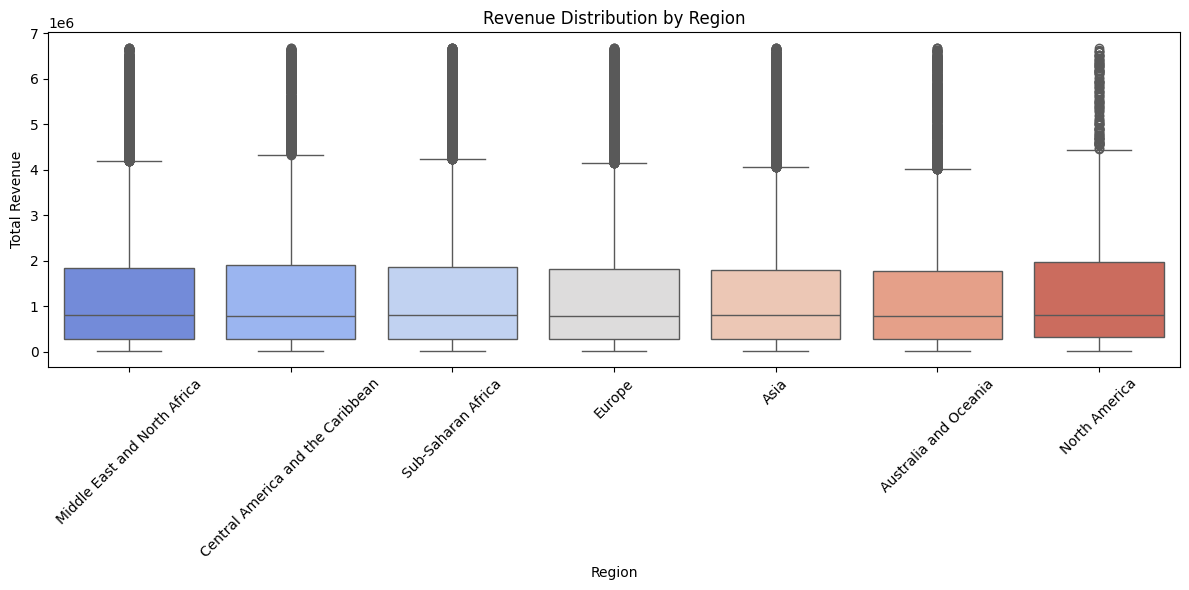

In [336]:
# 10. Revenue Distribution by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total Revenue', data=df1, palette='coolwarm')
plt.title('Revenue Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Total Units Sold by Year and Region


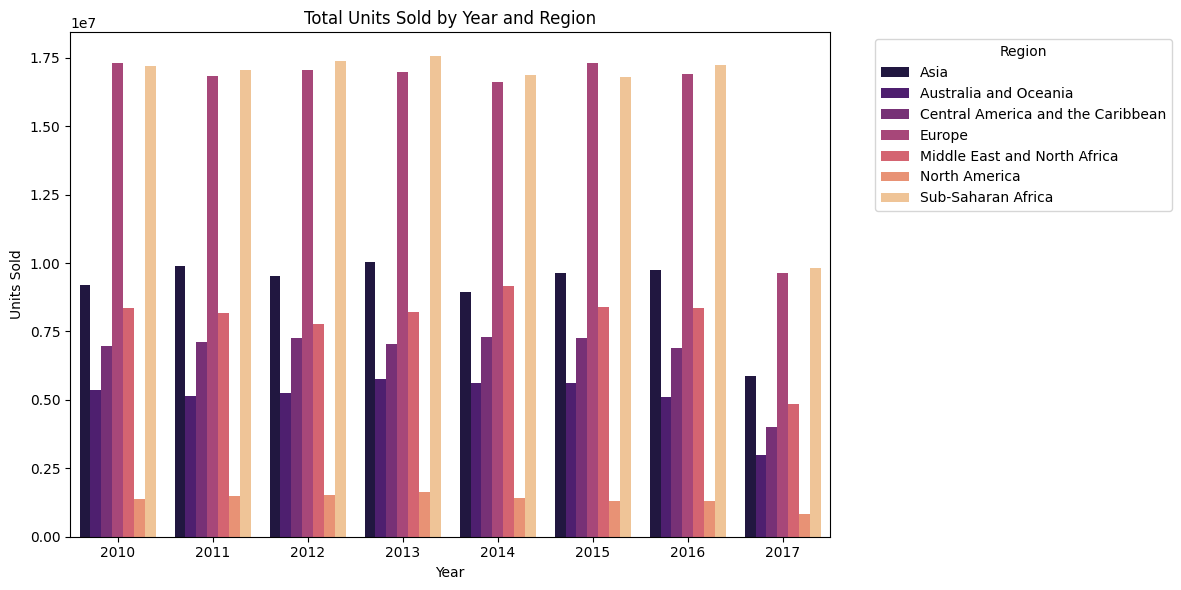

In [337]:
# 11. Total Units Sold by Year and Region
plt.figure(figsize=(12, 6))
units_sold_by_year_region = df1.groupby(['Year', 'Region'])['Units Sold'].sum().reset_index()
sns.barplot(x='Year', y='Units Sold', hue='Region', data=units_sold_by_year_region, palette='magma')
plt.title('Total Units Sold by Year and Region')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Enfec Solutions\AppData\Local\Temp\ipykernel_56364\4264059940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Total Profit', data=df1, palette='coolwarm')


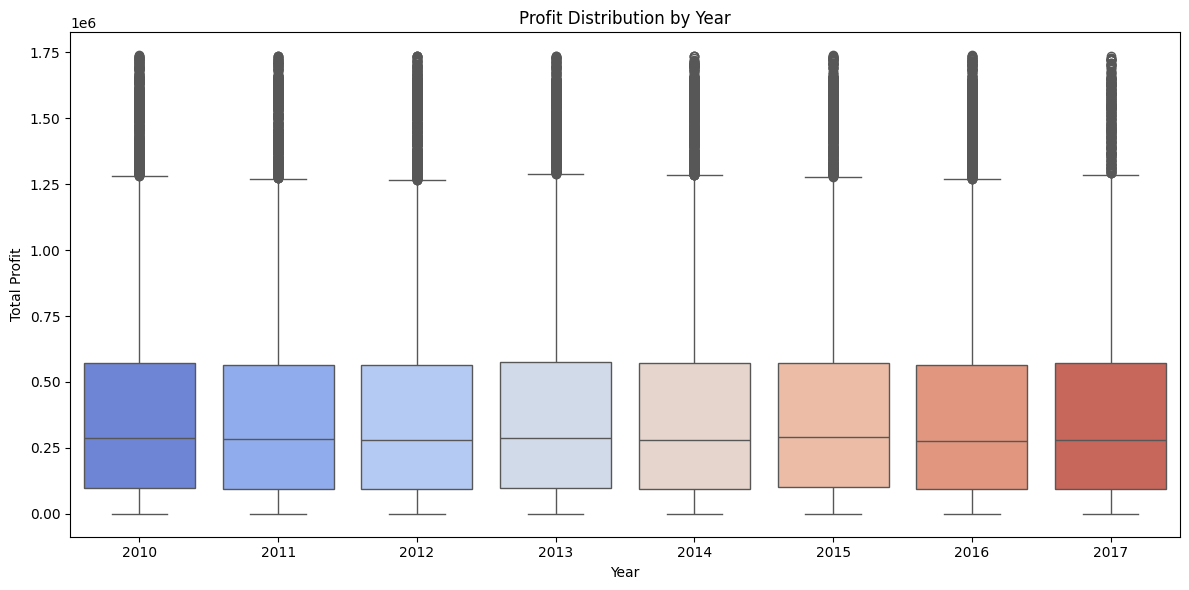

In [338]:
# 12. Profit Distribution by Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Total Profit', data=df1, palette='coolwarm')
plt.title('Profit Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

## Heatmap of Revenue and Profit Correlation

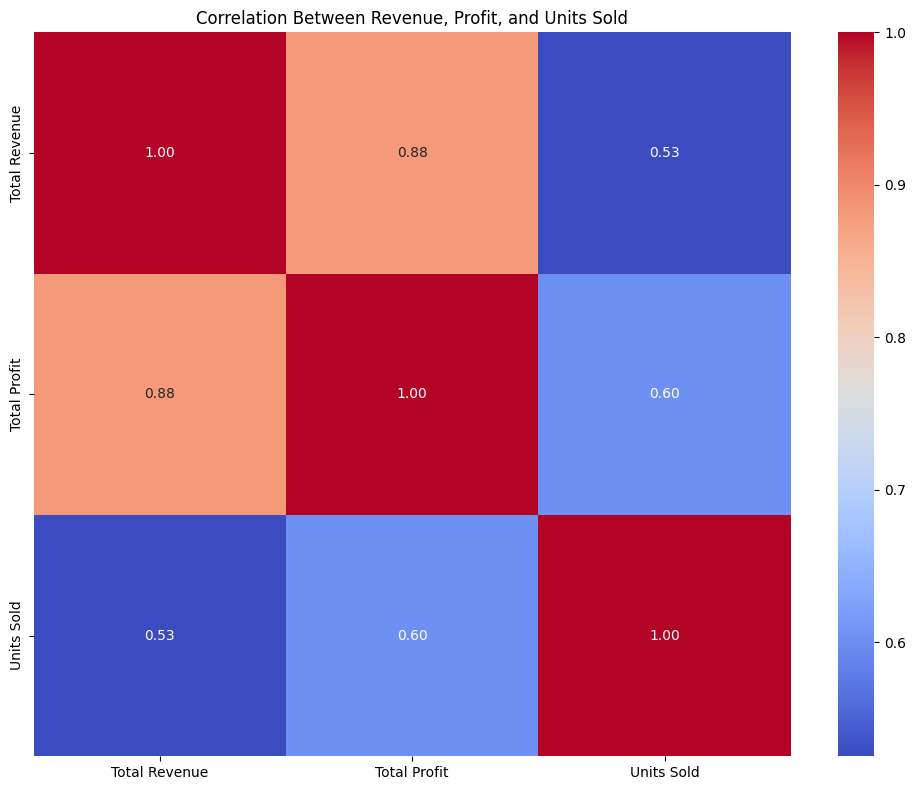

In [339]:
# 13. Heatmap of Revenue and Profit Correlation
plt.figure(figsize=(10, 8))
correlation = df1[['Total Revenue', 'Total Profit', 'Units Sold']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Revenue, Profit, and Units Sold')
plt.tight_layout()
plt.show()

# Time Series Forecasting

In [340]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [341]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor

In [342]:
sales_data = pd.read_csv(r"100000 Sales Records - final.csv")

In [343]:
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [344]:
# Create a pseudo-time index assuming rows are ordered sequentially in time
sales_data['Time_Index'] = np.arange(len(sales_data))

In [345]:
# Extracting relevant feature for trend analysis
time_index = sales_data['Time_Index']
sales_revenue = sales_data['Total Revenue']

In [346]:
# Step 1: Regression Analysis to Identify Trends
X = time_index.values.reshape(-1, 1)
y = sales_revenue


In [347]:
X

array([[    0],
       [    1],
       [    2],
       ...,
       [99997],
       [99998],
       [99999]])

In [348]:
y

0         142509.72
1        1989697.20
2          93169.38
3         745214.14
4        3914725.66
            ...    
99995    1082599.10
99996    1380424.08
99997    1087117.44
99998    3066958.00
99999    1411718.80
Name: Total Revenue, Length: 100000, dtype: float64

In [349]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [350]:
# Predicted trend
trend_line = linear_model.predict(X)


In [351]:
# Document regression results
slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(f"Regression Equation: Total_Revenue = {intercept:.2f} + {slope:.2f} * Time_Index")

Regression Equation: Total_Revenue = 1333165.31 + 0.06 * Time_Index


In [352]:
# Step 2: Time Series Decomposition for Seasonal and Residual Analysis
decomposition = seasonal_decompose(sales_revenue, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

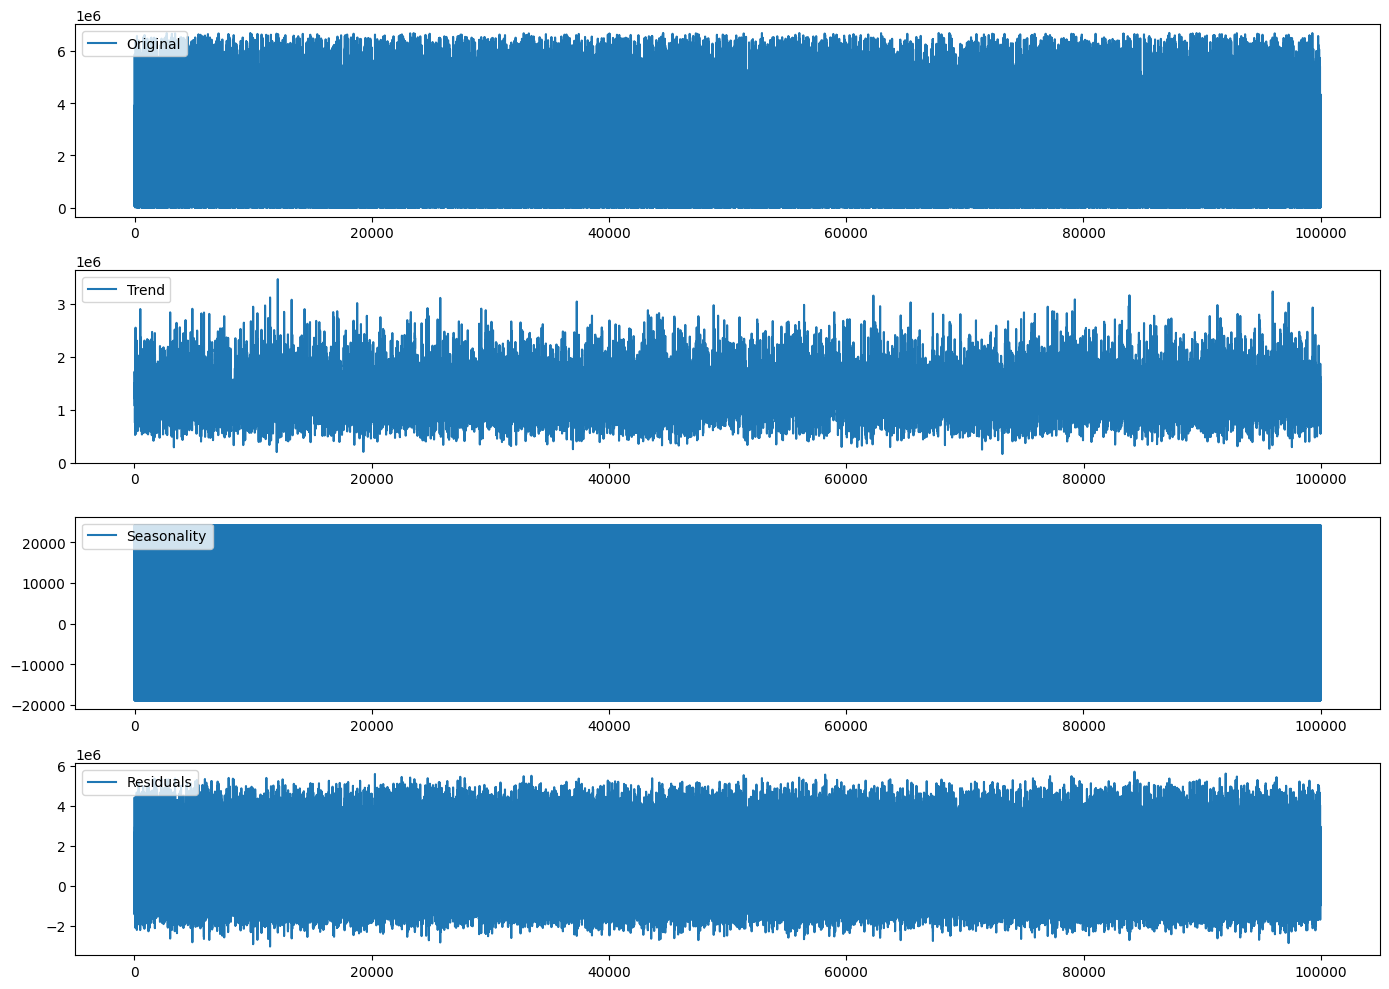

In [353]:
# Plot decomposition results
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(sales_revenue, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [354]:
# Step 3: Time Series Forecasting
# Splitting the data into train and test sets
X_train = X[:-12]  # Use all but the last 12 points for training
y_train = y[:-12]
X_test = X[-12:]  # Use the last 12 points for testing
y_test = y[-12:]

In [355]:
# Training a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [356]:
y_pred = rf_model.predict(X_test)

In [357]:
# Function to forecast based on user input
def forecast_sales(input_time_indices):
    # Ensure the input is in the correct shape
    input_time_indices = np.array(input_time_indices).reshape(-1, 1)
    predictions = rf_model.predict(input_time_indices)
    return predictions

In [358]:
# Example user input (forecasting for the next 12 months)
future_indices = np.arange(len(sales_data), len(sales_data) + 12)
future_forecast = forecast_sales(future_indices)

In [359]:
# Output the forecast
print("Future Forecasts:")
for idx, forecast in zip(future_indices, future_forecast):
    print(f"Time Index {idx}: Predicted Total Revenue = {forecast:.2f}")

Future Forecasts:
Time Index 100000: Predicted Total Revenue = 634690.66
Time Index 100001: Predicted Total Revenue = 634690.66
Time Index 100002: Predicted Total Revenue = 634690.66
Time Index 100003: Predicted Total Revenue = 634690.66
Time Index 100004: Predicted Total Revenue = 634690.66
Time Index 100005: Predicted Total Revenue = 634690.66
Time Index 100006: Predicted Total Revenue = 634690.66
Time Index 100007: Predicted Total Revenue = 634690.66
Time Index 100008: Predicted Total Revenue = 634690.66
Time Index 100009: Predicted Total Revenue = 634690.66
Time Index 100010: Predicted Total Revenue = 634690.66
Time Index 100011: Predicted Total Revenue = 634690.66


In [360]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 956645.4014666667
Mean Squared Error: 1969780058929.0146


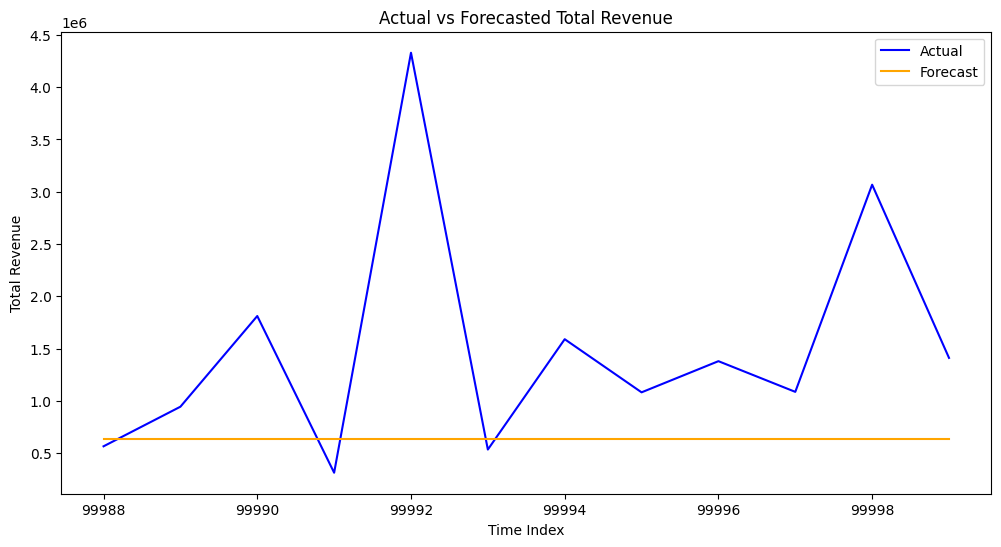

In [361]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Forecast', color='orange')
plt.xlabel('Time Index')
plt.ylabel('Total Revenue')
plt.title('Actual vs Forecasted Total Revenue')
plt.legend()
plt.show()

## Using Arima 

In [362]:
from statsmodels.tsa.arima.model import ARIMA

In [363]:
sales_data1 = pd.read_csv(r"100000 Sales Records - final.csv")

In [364]:
# Create a pseudo-time index assuming rows are ordered sequentially in time
sales_data1['Time_Index'] = np.arange(len(sales_data1))

# Extract the target variable (Total_Revenue)
series = sales_data1['Total Revenue']

In [365]:
# Step 1: Fit an ARIMA model
# Using an order of (p=1, d=1, q=1) as a starting point
model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()

In [366]:
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Total Revenue   No. Observations:               100000
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1563230.442
Date:                Sun, 05 Jan 2025   AIC                        3126466.884
Time:                        21:38:16   BIC                        3126495.422
Sample:                             0   HQIC                       3126475.544
                             - 100000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0053      0.004     -1.319      0.187      -0.013       0.003
ma.L1         -0.9999   8.63e-05  -1.16e+04      0.000      -1.000      -1.000
sigma2      2.705e+12   2.03e-19   1.33e+31      0.0

In [367]:
# Step 2: Forecast future values
forecast_steps = 12  # Number of future periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)

In [368]:
# Output the forecast
future_indices = np.arange(len(series), len(series) + forecast_steps)
print("Future Forecasts:")
for idx, forecast_value in zip(future_indices, forecast):
    print(f"Time Index {idx}: Predicted Total Revenue = {forecast_value:.2f}")

Future Forecasts:
Time Index 100000: Predicted Total Revenue = 1335531.26
Time Index 100001: Predicted Total Revenue = 1335934.01
Time Index 100002: Predicted Total Revenue = 1335931.89
Time Index 100003: Predicted Total Revenue = 1335931.90
Time Index 100004: Predicted Total Revenue = 1335931.90
Time Index 100005: Predicted Total Revenue = 1335931.90
Time Index 100006: Predicted Total Revenue = 1335931.90
Time Index 100007: Predicted Total Revenue = 1335931.90
Time Index 100008: Predicted Total Revenue = 1335931.90
Time Index 100009: Predicted Total Revenue = 1335931.90
Time Index 100010: Predicted Total Revenue = 1335931.90
Time Index 100011: Predicted Total Revenue = 1335931.90


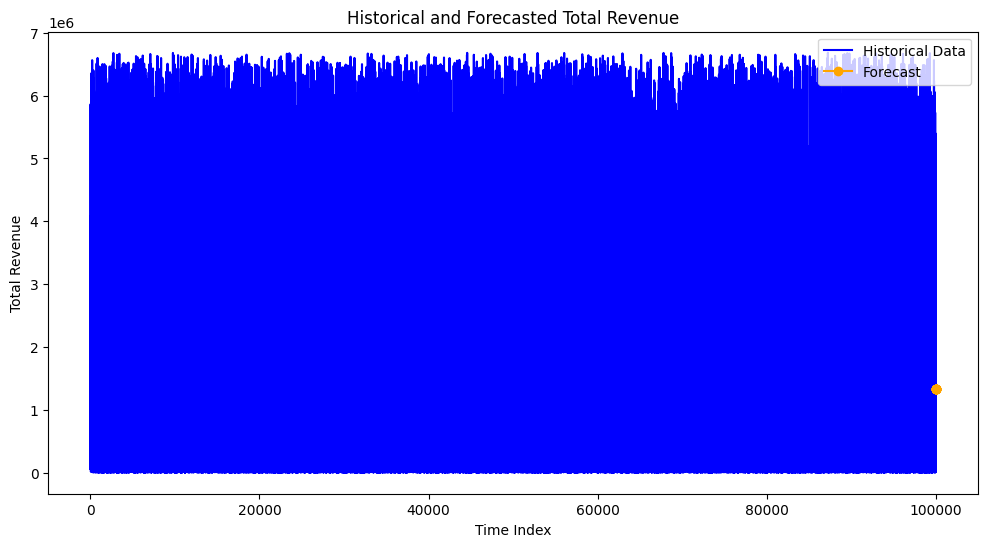

In [369]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Historical Data', color='blue')
plt.plot(future_indices, forecast, label='Forecast', color='orange', marker='o')
plt.xlabel('Time Index')
plt.ylabel('Total Revenue')
plt.title('Historical and Forecasted Total Revenue')
plt.legend()
plt.show()

## Using Sarimax

In [370]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [371]:
sarima_model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

In [372]:
sarima_fit = sarima_model.fit()

In [373]:
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Total Revenue   No. Observations:               100000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood            -1577739.320
Date:                            Sun, 05 Jan 2025   AIC                        3155488.640
Time:                                    21:47:59   BIC                        3155536.204
Sample:                                         0   HQIC                       3155503.075
                                         - 100000                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0054      0.008     -0.676      0.499      -0.021       0.010
ma.L1         -0.9996      0.000  -

In [374]:
# Forecasting
sarima_forecast = sarima_fit.forecast(steps=12)

In [375]:
for idx, forecast_value in zip(future_indices, sarima_forecast):
    print(f"Time Index {idx}: Predicted Total Revenue = {forecast_value:.2f}")

Time Index 100000: Predicted Total Revenue = 1330780.90
Time Index 100001: Predicted Total Revenue = 1307601.55
Time Index 100002: Predicted Total Revenue = 1336985.60
Time Index 100003: Predicted Total Revenue = 1305453.85
Time Index 100004: Predicted Total Revenue = 1348892.99
Time Index 100005: Predicted Total Revenue = 1304570.30
Time Index 100006: Predicted Total Revenue = 1315022.58
Time Index 100007: Predicted Total Revenue = 1309915.53
Time Index 100008: Predicted Total Revenue = 1304996.06
Time Index 100009: Predicted Total Revenue = 1302137.87
Time Index 100010: Predicted Total Revenue = 1318285.69
Time Index 100011: Predicted Total Revenue = 1296790.99


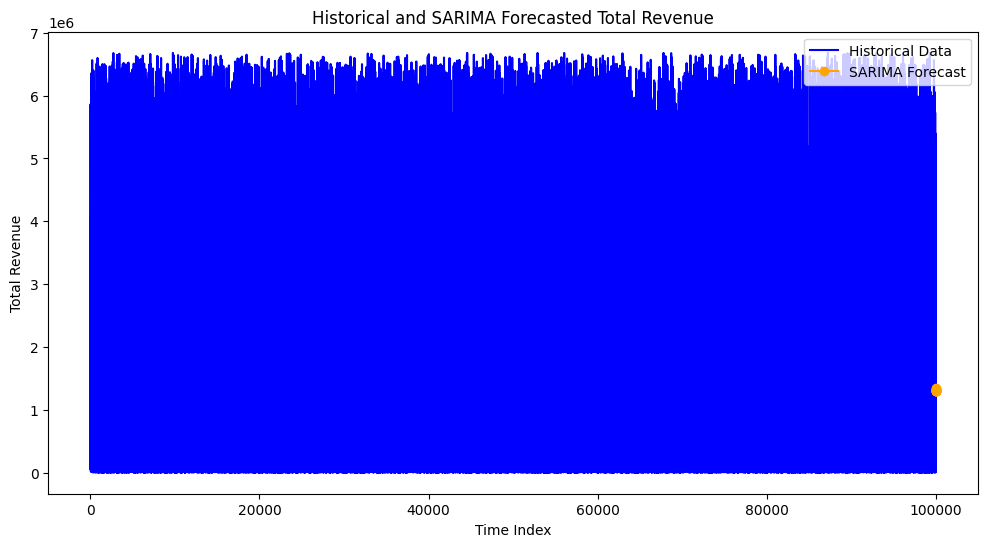

In [376]:
plt.figure(figsize=(12, 6))
plt.plot(series, label='Historical Data', color='blue')
plt.plot(range(len(series), len(series) + 12), sarima_forecast, label='SARIMA Forecast', color='orange', marker='o')
plt.title('Historical and SARIMA Forecasted Total Revenue')
plt.xlabel('Time Index')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

## Machine Learning

In [379]:
!pip install xgboost
!pip install tensorflow


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 3.4 MB/s eta 0:00:38
    --------------------------------------- 1.6/124.9 MB 4.0 MB/s eta 0:00:31
    --------------------------------------- 2.6/124.9 MB 4.4 MB/s eta 0:00:28
   - -------------------------------------- 3.7/124.9 MB 4.6 MB/s eta 0:00:27
   - -------------------------------------- 4.7/124.9 MB 4.8 MB/s eta 0:00:25
   - -------------------------------------- 5.5/124.9 MB 4.5 MB/s eta 0:00:27
   -- ------------------------------------- 6.6/124.9 MB 4.6 MB/s eta 0:00:26
   -- ------------------------------------- 7.9/124.9 MB 4.7 MB/s eta 0:00:25
   -- ------------------------------------- 8.9/124.9 MB 4.7 MB/s eta 0:00:25
   --- ------------------------------------ 10.5/124.9 MB 5.1 MB/s eta 0:00:23
   --- ------------------------------------ 12.1/124.9 MB 5.3 MB/s eta 0:00:22
   ---- ----------------------------------- 13.6/124.9 MB 5.5 MB/s et

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [381]:
# Feature Engineering
sales_data['Time_Index'] = np.arange(len(sales_data))  # Create a time index
X = sales_data[['Time_Index']]  # Use Time_Index as a feature for simplicity
y = sales_data['Total Revenue']

In [382]:
X

,Time_Index
0,0
1,1
2,2
3,3
4,4
...,...
99995,99995
99996,99996
99997,99997
99998,99998


In [383]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [384]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100)
}

In [385]:
# Dictionary to store model performance
model_performance = {}

In [386]:
# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Store results
    model_performance[model_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }

c:\Users\Enfec Solutions\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Enfec Solutions\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Enfec Solutions\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Enfec Solutions\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

In [387]:
# Print model performance
for model_name, metrics in model_performance.items():
    print(f"{model_name}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R2: {metrics['R2']:.2f}\n")

Linear Regression:
  MAE: 1119572.58
  RMSE: 1467849.88
  R2: -0.00

Decision Tree:
  MAE: 1500637.86
  RMSE: 2096167.61
  R2: -1.04

Random Forest:
  MAE: 1315818.70
  RMSE: 1789401.70
  R2: -0.49

XGBoost:
  MAE: 1120885.16
  RMSE: 1469670.60
  R2: -0.00

